Let's go through the intro machine learning tutorial:
http://scikit-learn.org/stable/tutorial/basic/tutorial.html

We should have already installed sklearn if not then use:
pip install -U scikit-learn

Or follow the instructions at: http://scikit-learn.org/stable/install.html

In [1]:
from sklearn import datasets
#install test sets that come wiht sklearn
iris = datasets.load_iris()
digits = datasets.load_digits()

In [2]:
print(digits.data)

[[  0.   0.   5. ...,   0.   0.   0.]
 [  0.   0.   0. ...,  10.   0.   0.]
 [  0.   0.   0. ...,  16.   9.   0.]
 ..., 
 [  0.   0.   1. ...,   6.   0.   0.]
 [  0.   0.   2. ...,  12.   0.   0.]
 [  0.   0.  10. ...,  12.   1.   0.]]


In [3]:
digits.target

array([0, 1, 2, ..., 8, 9, 8])

In [4]:
digits.images[0]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.],
       [  0.,   0.,  13.,  15.,  10.,  15.,   5.,   0.],
       [  0.,   3.,  15.,   2.,   0.,  11.,   8.,   0.],
       [  0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.],
       [  0.,   5.,   8.,   0.,   0.,   9.,   8.,   0.],
       [  0.,   4.,  11.,   0.,   1.,  12.,   7.,   0.],
       [  0.,   2.,  14.,   5.,  10.,  12.,   0.,   0.],
       [  0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.]])

In [5]:
#Predict which digit is being represented by an image
from sklearn import svm
clf = svm.SVC(gamma=0.001, C=100.)
#gamma was set manually, this could be found automaticall with good values other tools
clf.fit(digits.data[:-1], digits.target[:-1]) 

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0, degree=3,
  gamma=0.001, kernel='rbf', max_iter=-1, probability=False,
  random_state=None, shrinking=True, tol=0.001, verbose=False)

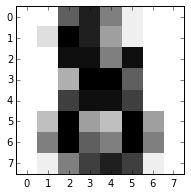

array([8])

In [9]:
from sklearn import datasets
import matplotlib.pyplot as plt
%matplotlib inline
#Load the digits dataset
digits = datasets.load_digits()

#Display the first digit
plt.figure(1, figsize=(3, 3))
plt.imshow(digits.images[-1], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

# predict which digit this is
clf.predict(digits.data[-1:])

Do you agree that this is an image of an 8?  Did something go wrong?  What could be done better.

#Model Persistence using pickle

In [11]:
from sklearn import svm
from sklearn import datasets
clf = svm.SVC()
iris = datasets.load_iris()
X, y = iris.data, iris.target
clf.fit(X, y)  



SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [13]:
import pickle
s = pickle.dumps(clf)
clf2 = pickle.loads(s)
clf2.predict(X[0:1])


array([0])

In [18]:
from sklearn.externals import joblib
joblib.dump(clf, 'filename.pkl') 
#gives back the list of files

['filename.pkl',
 'filename.pkl_01.npy',
 'filename.pkl_02.npy',
 'filename.pkl_03.npy',
 'filename.pkl_04.npy',
 'filename.pkl_05.npy',
 'filename.pkl_06.npy',
 'filename.pkl_07.npy',
 'filename.pkl_08.npy',
 'filename.pkl_09.npy',
 'filename.pkl_10.npy',
 'filename.pkl_11.npy']

In [20]:
clf = joblib.load('filename.pkl')

# Conventions

In [23]:
import numpy as np
from sklearn import random_projection





dtype('float64')

In [27]:
# default type is float64 unless specified
rng = np.random.RandomState(0)
X = rng.rand(10, 2000)
X = np.array(X, dtype='float32')

transformer = random_projection.GaussianRandomProjection()
X_new = transformer.fit_transform(X)

print ( "Data types for X = " + str(X.dtype) + " and X_new = "+ str(X_new.dtype))

Data types for X = float32 and X_new = float64


In [28]:
from sklearn import datasets
from sklearn.svm import SVC
iris = datasets.load_iris()
clf = SVC()
clf.fit(iris.data, iris.target)  

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [29]:
list(clf.predict(iris.data[:3]))

[0, 0, 0]

In [30]:
clf.fit(iris.data, iris.target_names[iris.target]) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=0.0,
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
list(clf.predict(iris.data[:3]))  

['setosa', 'setosa', 'setosa']

In [ ]:
# refitting and updating parameters

In [35]:
import numpy as np
from sklearn.svm import SVC

rng = np.random.RandomState(0)
X = rng.rand(100, 10)
y = rng.binomial(1, 0.5, 100)
X_test = rng.rand(5, 10)

clf = SVC()
clf.set_params(kernel='linear').fit(X, y)  
print ("Predict x_test: "+str(clf.predict(X_test)))
clf.set_params(kernel='rbf').fit(X, y)  
print ("Predict x_test after refitting: "+str(clf.predict(X_test)))


Predict x_test: [1 0 1 1 0]
Predict x_test after refitting: [0 0 0 1 0]
